Problem statement

# problem statement

The goal of this project is to develop a robust predictive model that can provide accurate sales predictions for each product at a specific store. By achieving this goal, BigMart aims to gain insights into the factors that drive sales and identify the properties of products and stores that have a significant impact on increasing sales. This will enable BigMart to make informed decisions and develop strategies to optimize their product offerings, inventory management, and store operations.
Identify key properties analyze the predictive model and extract insights on the key properties of products and stores that significantly influence sales. This includes identifying important features or variables that have the strongest correlation with sales and understanding their impact on sales performance.

Provide actionable recommendations based on the findings from the predictive model, provide actionable recommendations to BigMart on strategies for improving sales. This could include suggestions for product assortment, pricing strategies, store location optimization, or promotional activities that can be implemented to increase sales and maximize profitability.

By accomplishing these measurable objectives, the project aims to deliver a predictive model that can accurately estimate sales and provide valuable insights to BigMart for improving their business operations and driving sales growth.

# Hypothesis Generation

Store Location: 
Stores located in densely populated areas or areas with higher disposable income will likely have higher sales compared to stores in less populated or lower-income areas.

Store Size: 
Larger stores with more floor space might have a greater variety of products and attract more customers, resulting in higher sales compared to smaller stores.

Product Visibility: 
Products placed at eye level or in prominent store locations may have higher sales compared to products placed in less visible areas.

Product Price: 
Lower-priced products may have higher sales volume compared to higher-priced products, assuming other factors such as quality and brand reputation remain constant.

Promotion and Advertising: 
Products that are actively promoted through advertisements, discounts, or special offers may experience a boost in sales compared to products with limited promotional efforts.

Product Category: 
Certain product categories such as groceries, personal care items, or household essentials may have consistent and high sales across all stores, regardless of other factors.


Competitive Factors: 
Stores located in close proximity to competitors may experience lower sales compared to stores with limited competition in the area.

Store Layout and Design: 
Stores with well-organized layouts, appealing displays, and comfortable shopping environments may influence customers to spend more time and make more purchases.

# Loading package and data

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [311]:
df = pd.read_csv("Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [312]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [250]:
df.shape

(8523, 12)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [252]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [253]:
df.nunique()


Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [254]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [255]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [256]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

## Cleaning the Data

In [257]:
df. isnull(). sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [258]:
median1 = df["Item_Weight"].median()
mode = df["Outlet_Size"].mode().values[0]

df["Item_Weight"].replace(np.nan,median1,inplace=True)
df["Outlet_Size"] = df["Outlet_Size"].replace(np.nan, df["Outlet_Size"].mode()[0])



In [259]:
df. isnull() .sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Check the duplicate record

In [260]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


## Univariate Analysis

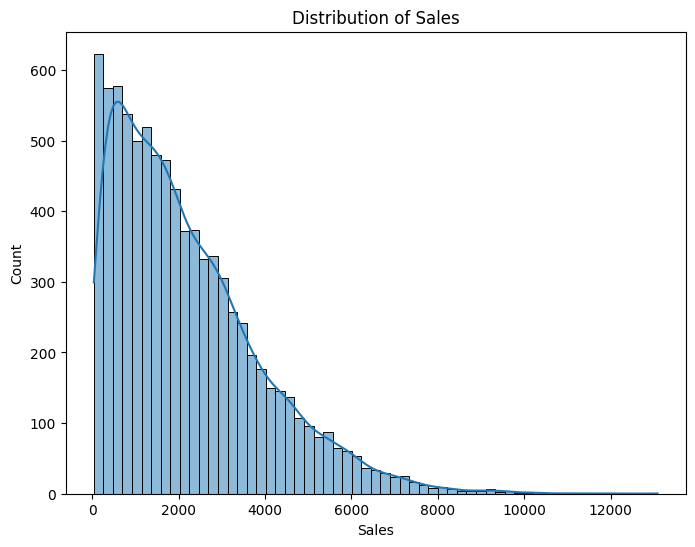

In [261]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Item_Outlet_Sales", kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()

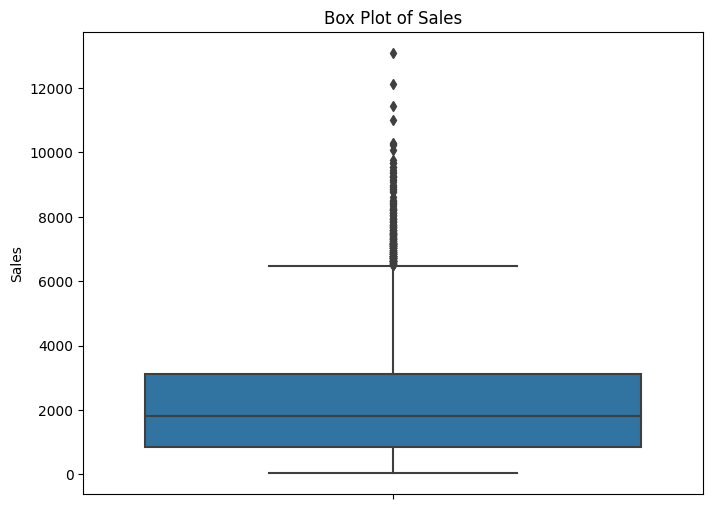

In [262]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y="Item_Outlet_Sales")
plt.title("Box Plot of Sales")
plt.ylabel("Sales")
plt.show()

## Bivariate Analysis

#### scatter plote

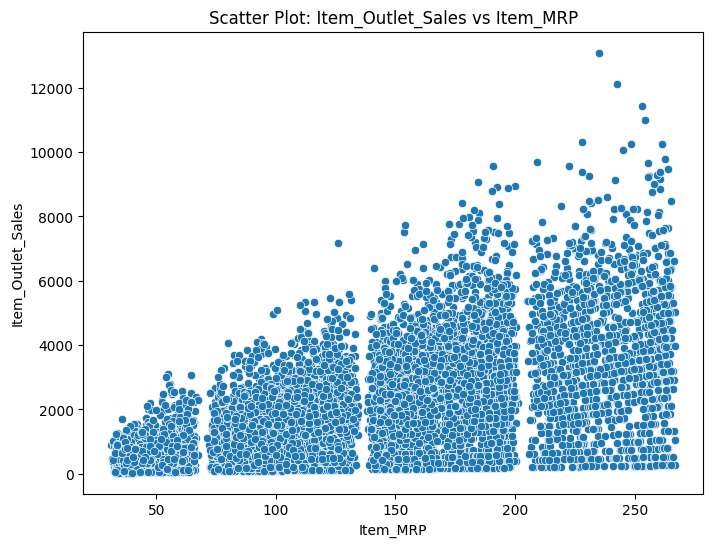

In [263]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Item_MRP", y="Item_Outlet_Sales")
plt.title("Scatter Plot: Item_Outlet_Sales vs Item_MRP")
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.show()

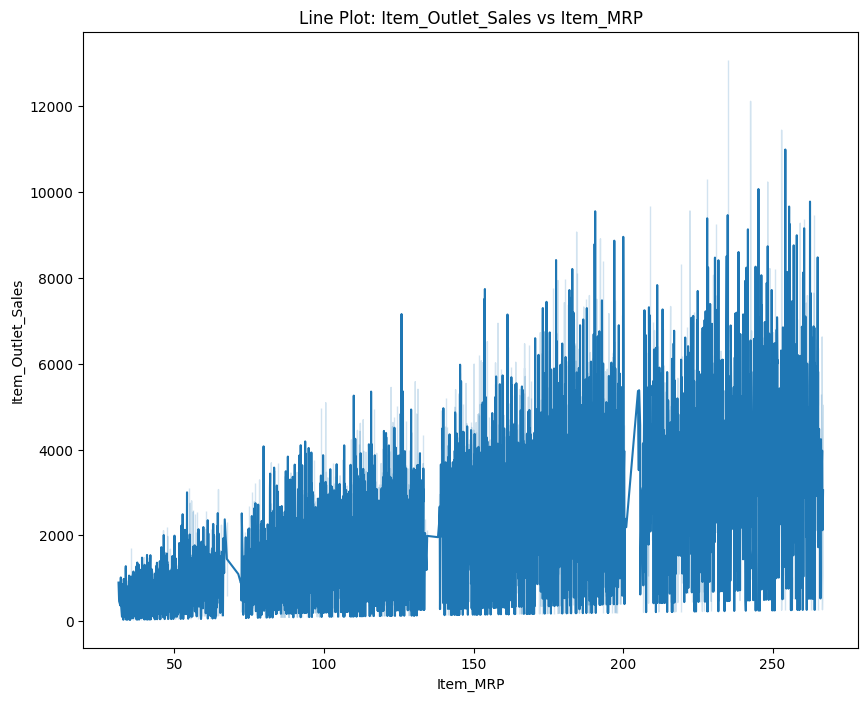

In [264]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=df, x="Item_MRP", y="Item_Outlet_Sales")
plt.title("Line Plot: Item_Outlet_Sales vs Item_MRP")
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.show()









## Relationship Analysis

C:\Users\mahim\AppData\Local\Temp\ipykernel_17068\2331149539.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\mahim\AppData\Local\Temp\ipykernel_17068\2331149539.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt= '.2f')


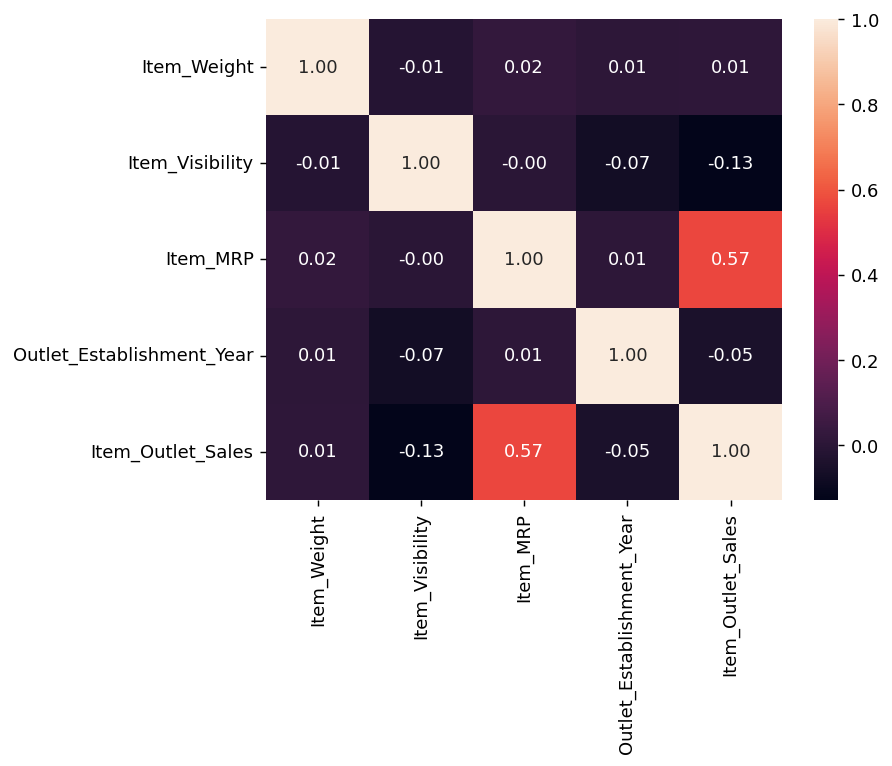

In [265]:
corr = df.corr()
 
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

### One hot encoding

In [266]:
 import category_encoders as ce

In [267]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [268]:

 
one_hot_encoded_data = pd.get_dummies(df, columns = ['Item_Type', 'Outlet_Size','Outlet_Type','Item_Fat_Content'])
print(type(one_hot_encoded_data))


# #Create object for one-hot encoding
# encoder=ce.OneHotEncoder(cols='df',handle_unknown='return_nan',return_df=True,use_cat_names=True)


<class 'pandas.core.frame.DataFrame'>


In [269]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   object 
 5   Outlet_Establishment_Year        8523 non-null   int64  
 6   Outlet_Location_Type             8523 non-null   object 
 7   Item_Outlet_Sales                8523 non-null   float64
 8   Item_Type_Baking Goods           8523 non-null   uint8  
 9   Item_Type_Breads                 8523 non-null   uint8  
 10  Item_Type_Breakfast              8523 non-null   uint8  
 11  Item_Type_Canned                 8523 non-null   uint8  
 12  Item_Type_Dairy     

In [270]:
df = one_hot_encoded_data

In [271]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,Tier 1,3735.1380,0,0,...,0,0,1,0,0,0,1,0,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,Tier 3,443.4228,0,0,...,0,0,0,1,0,0,0,1,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,Tier 1,2097.2700,0,0,...,0,0,1,0,0,0,1,0,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,Tier 3,732.3800,0,0,...,0,1,0,0,0,0,0,1,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,Tier 3,994.7052,0,0,...,0,0,1,0,0,0,1,0,0,0


In [272]:
df_loc = df.drop(["Outlet_Location_Type", "Outlet_Identifier"], axis=1)
df_loc.head()


,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg
0,FDA15,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,DRC01,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,FDN15,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,FDX07,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,NCD19,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [273]:
df = df_loc

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Item_Outlet_Sales                8523 non-null   float64
 6   Item_Type_Baking Goods           8523 non-null   uint8  
 7   Item_Type_Breads                 8523 non-null   uint8  
 8   Item_Type_Breakfast              8523 non-null   uint8  
 9   Item_Type_Canned                 8523 non-null   uint8  
 10  Item_Type_Dairy                  8523 non-null   uint8  
 11  Item_Type_Frozen Foods           8523 non-null   uint8  
 12  Item_Type_Fruits and

## Training validation

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the df and a variable y equal to the "Item_Outlet_Sales" column. **

In [276]:
y = df['Item_Outlet_Sales']

In [277]:
X = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 	'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast','Item_Type_Canned', 'Outlet_Size_Small', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',	'Outlet_Type_Supermarket Type3', 'Item_Fat_Content_LF', 'Item_Fat_Content_Low Fat',	'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',	'Item_Fat_Content_reg']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [278]:
from sklearn.model_selection import train_test_split

In [285]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [286]:
from sklearn.linear_model import LinearRegression

In [287]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [288]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [289]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 1.29964406e+00 -4.31805678e+02  1.56226148e+01  3.53167668e+00
  5.42146911e+00  1.00535724e+02  1.30209324e+02  6.39115918e+01
  4.31953693e+01 -1.73387472e+03  2.13532741e+02 -1.66647503e+02
  1.68698948e+03 -3.05943975e+01 -1.74862807e+01  2.67475924e+01
  6.17676641e+01 -4.04345782e+01]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [290]:
predictions = lm.predict( X_val)

In [293]:
predictions

array([1311.75621433, 2384.99158156, 1469.59410134, ..., 1587.75970511,
       3084.86063466, 3765.05086367])

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [294]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_val, predictions))
print('MSE:', metrics.mean_squared_error(y_val, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, predictions)))

MAE: 809.2104161831489
MSE: 1161431.467501388
RMSE: 1077.6972986425214


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [299]:
from sklearn.ensemble import RandomForestRegressor

In [300]:
rfc = RandomForestRegressor(n_estimators=600)

In [301]:
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=600)

In [303]:
predictions = rfc.predict(X_val)

In [304]:
print('MAE:', metrics.mean_absolute_error(y_val, predictions))
print('MSE:', metrics.mean_squared_error(y_val, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, predictions)))

MAE: 770.249196380915
MSE: 1191759.96960944
RMSE: 1091.6775941684614


# Test data prediction

In [313]:
df = pd.read_csv("Test.csv")
df.head()

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [314]:
df.tail()

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [315]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0                              5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [317]:
df.nunique()

                             1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

## Cleaning the data

In [318]:
df.isnull(). sum()

                                0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [319]:
median1 = df["Item_Weight"].median()
mode = df["Outlet_Size"].mode().values[0]

df["Item_Weight"].replace(np.nan,median1,inplace=True)
df["Outlet_Size"] = df["Outlet_Size"].replace(np.nan, df["Outlet_Size"].mode()[0])


In [320]:
df.isnull(). sum()

                             0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## cheack the duplicate

In [321]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [322]:
import category_encoders as ce

In [323]:
df

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [324]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Item_Type', 'Outlet_Size','Outlet_Type','Item_Fat_Content'])
print(type(one_hot_encoded_data))


<class 'pandas.core.frame.DataFrame'>


In [325]:
one_hot_encoded_data.head()

,,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg
0,FDW58,20.750,0.007565,107.8622,OUT049,1999,Tier 1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,FDW14,8.300,0.038428,87.3198,OUT017,2007,Tier 2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,NCN55,14.600,0.099575,241.7538,OUT010,1998,Tier 3,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,FDQ58,7.315,0.015388,155.0340,OUT017,2007,Tier 2,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,FDY38,12.500,0.118599,234.2300,OUT027,1985,Tier 3,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [326]:
df = one_hot_encoded_data

In [327]:
df.head()

,,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg
0,FDW58,20.750,0.007565,107.8622,OUT049,1999,Tier 1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,FDW14,8.300,0.038428,87.3198,OUT017,2007,Tier 2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,NCN55,14.600,0.099575,241.7538,OUT010,1998,Tier 3,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,FDQ58,7.315,0.015388,155.0340,OUT017,2007,Tier 2,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,FDY38,12.500,0.118599,234.2300,OUT027,1985,Tier 3,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [328]:
df_loc = df.drop(["Outlet_Location_Type", "Outlet_Identifier"], axis=1)
df_loc.head()


,,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg
0,FDW58,20.750,0.007565,107.8622,1999,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,FDW14,8.300,0.038428,87.3198,2007,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,NCN55,14.600,0.099575,241.7538,1998,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,FDQ58,7.315,0.015388,155.0340,2007,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,FDY38,12.500,0.118599,234.2300,1985,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
